In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import pickle

In [ ]:
root = "/gdrive/My Drive/CS470"
root_data = '/gdrive/My Drive/CS470/data'
root_midi = '/gdrive/My Drive/CS470/data/midi'

In [ ]:
import os
os.chdir(root)
os.getcwd()

'/gdrive/My Drive/CS470'

In [ ]:
!git clone https://github.com/bearpelican/musicautobot.git

fatal: destination path 'musicautobot' already exists and is not an empty directory.


In [ ]:
os.chdir('musicautobot')
os.getcwd()

'/gdrive/My Drive/CS470/musicautobot'

In [ ]:
!apt-get update
!apt install musescore fluidsynth

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:12 http://archive.ubuntu.com/ubu

In [ ]:
!pip install torch fastai music21 pebble fluidsynth midi2audio

  Created wheel for fluidsynth: filename=fluidsynth-0.2-cp36-none-any.whl size=4513 sha256=aa07fdcd1e9058d84165a7bcced846d0142711835e9b8d8fa3f3cb4278cde353
  Stored in directory: /root/.cache/pip/wheels/2d/70/4d/ffe2589bbfe9c268780570a6875583fbf59547004459e2c3c3
Successfully built fluidsynth


In [ ]:
os.getcwd()

'/gdrive/My Drive/CS470/musicautobot'

In [ ]:
from musicautobot.numpy_encode import *
from musicautobot.config import *
from musicautobot.music_transformer import *
from musicautobot.multitask_transformer import *
from musicautobot.utils import midifile

In [ ]:
os.chdir('..')
os.getcwd()

'/gdrive/My Drive/CS470'

In [ ]:
!ls 

 20160871.ipynb   assignment3_before		 musicautobot
 assignment2	 ' assignment3_problems.ipynb'
 assignment3	  data


In [ ]:
with open("data/dataset_np.pkl", "rb") as fd:
  data = pickle.load(fd)
print(data[0])
with open("data/vocab.pkl", "rb") as fd:
  vocab = pickle.load(fd)

{'title': 'I Saw Her Standing There', 'lyrics': '[Intro: Paul McCartney]\n1, 2, 3, 4!\n\n[Verse 1: Paul McCartney, McCartney & John Lennon]\nWell, she was just 17, if you know what I mean\nAnd the way she looked\nWas way beyond compare\nSo how could I dance with another? (Ooh)\nWhen I saw her standing there?\n\n[Verse 2: Paul McCartney, McCartney & John Lennon]\nWell, she looked at me, and I, I could see\nThat before too long, I\'d fall in love with her\nShe wouldn\'t dance with another (Woo)\nWhen I saw her standing there\n\n[Bridge: Paul McCartney & John Lennon]\nWell, my heart went "boom"\nWhen I crossed that room\nAnd I held her hand in mine\n\n[Verse 3: Paul McCartney, McCartney & John Lennon]\nWell, we danced through the night\nAnd we held each other tight\nAnd before too long, I fell in love with her\nNow, I\'ll never dance with another (Woo)\nSince I saw her standing there\n\n[Guitar Solo: George Harrison]\n\n[Bridge: Paul McCartney & John Lennon]\nWell, my heart went "boom"\nW

# Only first time

In [ ]:
vocab = MusicVocab.create()

In [ ]:
for idx, i in enumerate(data):
  try: 
    item = MusicItem.from_file(i["midi"], vocab)
    i['np'] = item.to_tensor()
  except:
    print(idx)

82
171
172
174
183
185
186
193
196
212
214
215
218
221
222
224
225
230
232
234
240
282
283
284
294
303
306
308
312
316
317


In [ ]:
tmp = list(filter(lambda x: type(x['np']) != int, data))

In [ ]:
data = tmp

In [ ]:
with open(root_data + "/dataset_np.pkl", "wb") as fd:
  pickle.dump(data, fd)

In [ ]:
with open(root_data + "/vocab.pkl", "wb") as fd:
  pickle.dump(vocab, fd)

In [ ]:
len(list(vocab.stoi.items()))

312

In [ ]:

example_music = MusicItem.from_file(data[0]['midi'], vocab)

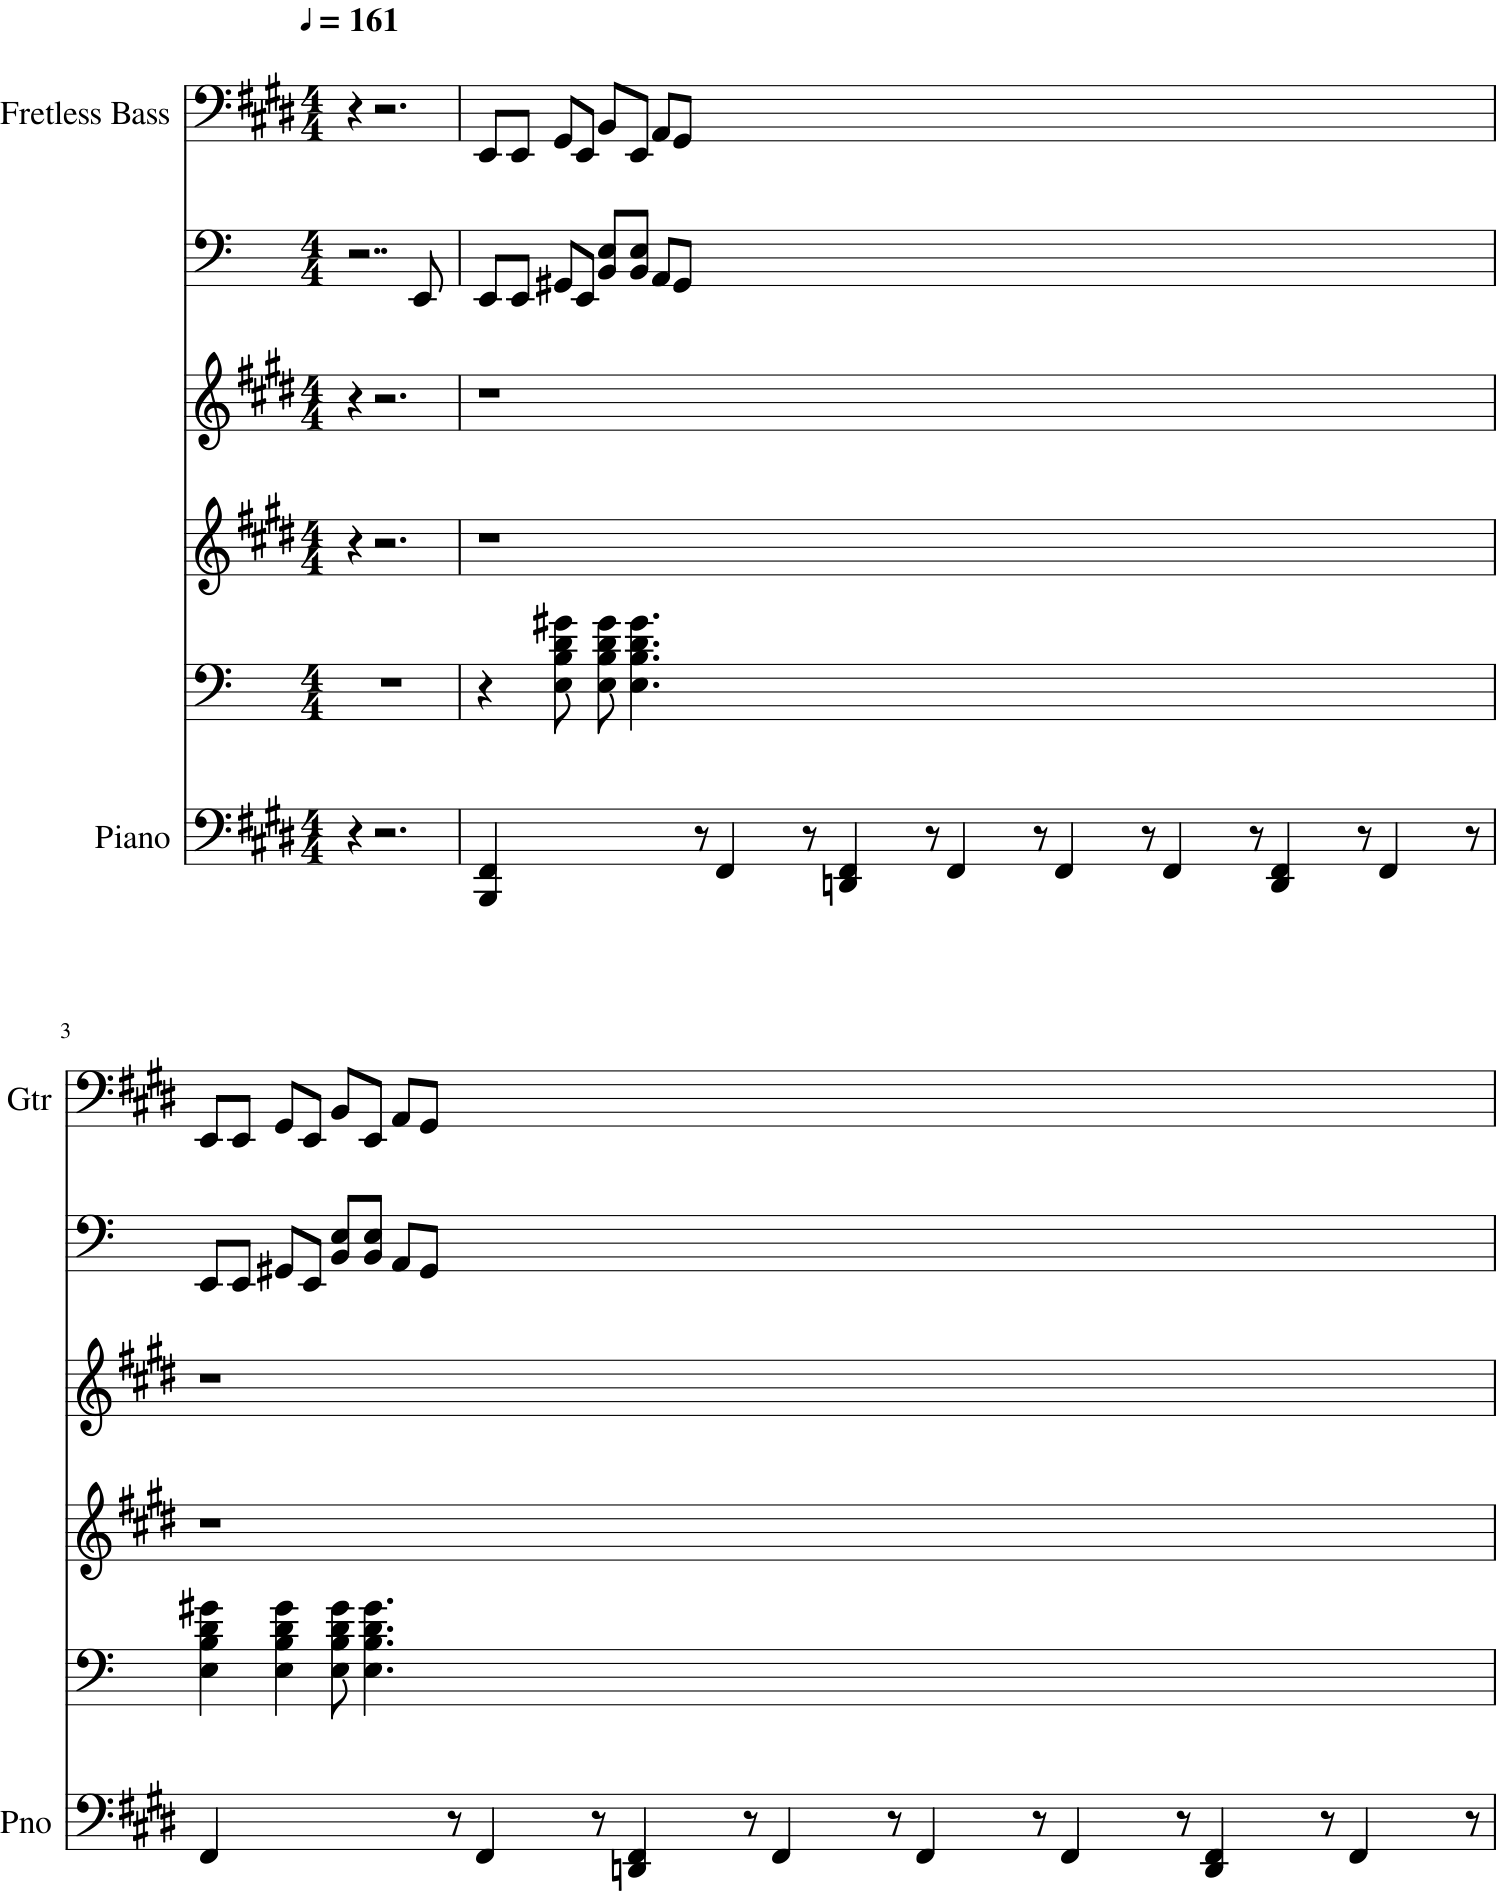

In [ ]:
example_music.show()

In [ ]:
from midi2audio import FluidSynth
from IPython.display import Audio

example_music = MusicItem.from_file(data[0]['midi'], vocab)

# Colab cannot play music directly from music21 - must convert to .wav first
def play_wav(stream):
    out_midi = stream.write('midi')
    out_wav = str(Path(out_midi).with_suffix('.wav'))
    FluidSynth("font.sf2").midi_to_audio(out_midi, out_wav)
    return Audio(out_wav)

# seed_item.play()
play_wav(example_music.stream)

In [ ]:
out_midi = example_music.stream.write('midi')
out_wav = str(Path(out_midi).with_suffix('.wav'))
FluidSynth("font.sf2").midi_to_audio(out_midi, out_wav)

In [ ]:
!ls  data

dataset_np.pkl	exmaple_1.midi	midi  vocab.pkl


In [ ]:
# save the midi
example_music.stream.write('midi', fp='data/exmaple_1.midi')


'data/exmaple_1.midi'

In [ ]:
out_wav

'/tmp/music21/tmpu5azx4_a.wav'

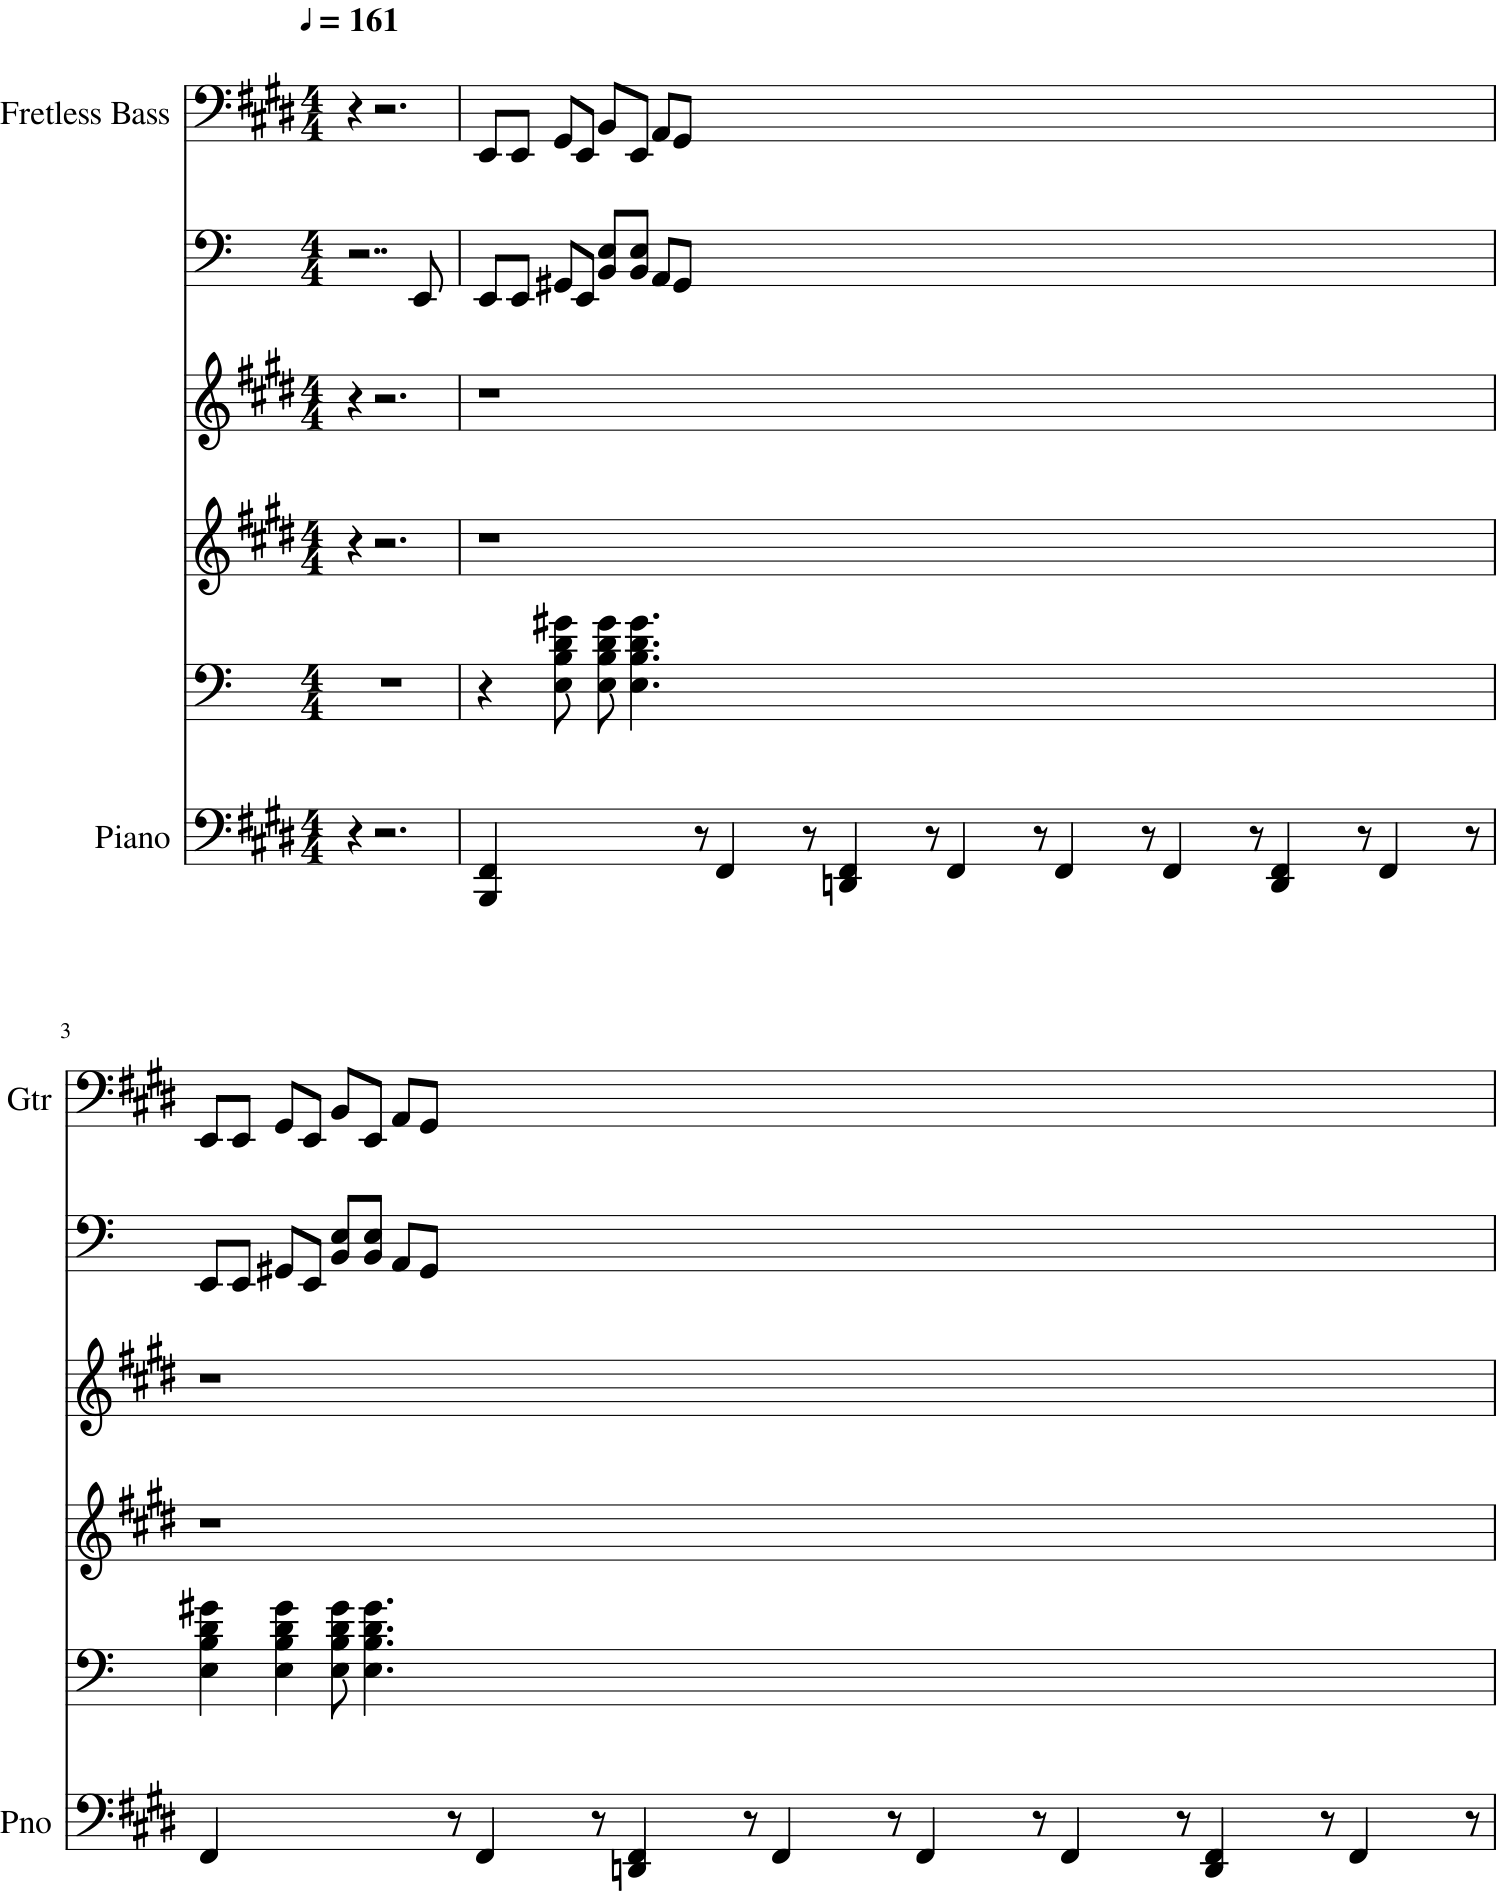

In [ ]:
example_music.show()

In [ ]:
# seed_item.play()
#play_wav(example_music.stream)

yes


# Model

In [ ]:
import math
import torch
import torch.nn as nn
import torch.nn.functional as F

class TransformerModel(nn.Module):

    def __init__(self, ntoken, ninp, nhead, nhid, nlayers, dropout=0.5):
        super(TransformerModel, self).__init__()
        from torch.nn import TransformerEncoder, TransformerEncoderLayer
        self.model_type = 'Transformer'
        self.pos_encoder = PositionalEncoding(ninp, dropout)
        encoder_layers = TransformerEncoderLayer(ninp, nhead, nhid, dropout)
        self.transformer_encoder = TransformerEncoder(encoder_layers, nlayers)
        self.encoder = nn.Embedding(ntoken, ninp)
        self.ninp = ninp
        self.decoder = nn.Linear(ninp, ntoken)

        self.init_weights()

    def generate_square_subsequent_mask(self, sz):
        mask = (torch.triu(torch.ones(sz, sz)) == 1).transpose(0, 1)
        mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
        return mask

    def init_weights(self):
        initrange = 0.1
        self.encoder.weight.data.uniform_(-initrange, initrange)
        self.decoder.bias.data.zero_()
        self.decoder.weight.data.uniform_(-initrange, initrange)

    def forward(self, src, src_mask):
        src = self.encoder(src) * math.sqrt(self.ninp)
        src = self.pos_encoder(src)
        output = self.transformer_encoder(src, src_mask)
        output = self.decoder(output)
        return output

In [ ]:
class PositionalEncoding(nn.Module):

    def __init__(self, d_model, dropout=0.1, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:x.size(0), :]
        return self.dropout(x)

In [ ]:
ntokens = len(list(vocab.stoi.items())) + 1 # the size of vocabulary
padding_n = len(list(vocab.stoi.items()))
emsize = 200 # embedding dimension
nhid = 200 # the dimension of the feedforward network model in nn.TransformerEncoder
nlayers = 2 # the number of nn.TransformerEncoderLayer in nn.TransformerEncoder
nhead = 2 # the number of heads in the multiheadattention models
dropout = 0.2 # the dropout value
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = TransformerModel(ntokens, emsize, nhead, nhid, nlayers, dropout).to(device)
bptt = 8

device

device(type='cuda')

In [ ]:
def get_batch(source, i):
    seq_len = min(bptt, len(source) - 1 - i)
    data = nn.utils.rnn.pad_sequence(source[i:i+seq_len], batch_first=True, padding_value=padding_n)
    target = torch.roll(data, -1, 1)
    target[:, -1] = padding_n
    return data, target

In [ ]:

train_data = list(map(lambda x: x["np"], data))
train_data[0]

tensor([  0,   1,   8,  ..., 189,  49, 189], device='cuda:0')

In [ ]:
def evaluate(eval_model, data_source):
    eval_model.eval() # Turn on the evaluation mode
    total_loss = 0.
    ntokens = len(vocab.stoi)
    src_mask = model.generate_square_subsequent_mask(bptt).to(device)
    with torch.no_grad():
        for batch, i in enumerate(range(0, len(data), bptt)):
            x, y = get_batch(train_data, i)
            x = x.to(device)
            y = y.to(device) 
            if x.size(0) != bptt:
                src_mask = model.generate_square_subsequent_mask(x.size(0)).to(device)
            output = model(x, src_mask)
            preds = output.transpose(1, 2)

            total_loss += len(x) * criterion(preds.float(), y.long()).item()
    return total_loss / (len(data) - 1)

In [104]:
print(len(data), bptt)
for batch, i in enumerate(range(0, len(data), bptt)):
  print(batch, i)
  x, y = get_batch(train_data, i)
  print(x.shape)
  print(x[:10].shape)
  print(y.shape)
  sys.exit()

288 8
0 0
torch.Size([8, 9642])
torch.Size([8, 9642])
torch.Size([8, 9642])


SystemExit: ignored

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
criterion = nn.CrossEntropyLoss()
lr = 5.0 # learning rate
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.95)

import time
def train():
    model.train() # Turn on the train mode
    total_loss = 0.
    start_time = time.time()
    ntokens = len(vocab.stoi)
    src_mask = model.generate_square_subsequent_mask(bptt).to(device)
    for batch, i in enumerate(range(0, len(data), bptt)):
        x, y = get_batch(train_data, i)
        x = x.to(device)
        y = y.to(device) 
        
        optimizer.zero_grad()
        if x.size(0) != bptt:
            src_mask = model.generate_square_subsequent_mask(x.size(0)).to(device)
        output = model(x, src_mask)
        # _, preds = torch.max(output, dim=2)

        preds = output.transpose(1, 2)

        # print("x", x.dtype, x.shape)
        # print("output", output.dtype, output.shape)
        # print("preds", preds.dtype, preds.shape)
        # print("y", y.dtype, y.shape)
        # print("\n\n")

        loss = criterion(preds.float(), y.long())
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.5)
        optimizer.step()

        total_loss += loss.item()
        log_interval = 5
        if batch % log_interval == 0 and batch > 0:
            cur_loss = total_loss / log_interval
            elapsed = time.time() - start_time
            print('| epoch {:3d} | {:5d}/{:5d} batches | '
                  'lr {:02.2f} | ms/batch {:5.2f} | '
                  'loss {:5.2f} | ppl {:8.2f}'.format(
                    epoch, batch, len(train_data) // bptt, scheduler.get_lr()[0],
                    elapsed * 1000 / log_interval,
                    cur_loss, math.exp(cur_loss)))
            total_loss = 0
            start_time = time.time()

In [ ]:
best_val_loss = float("inf")
epochs = 20 # The number of epochs
best_model = None

loss_list = []

for epoch in range(1, epochs + 1):
    epoch_start_time = time.time()
    train()
    val_loss = evaluate(model, train_data)
    loss_list.append(val_loss)
    print('-' * 89)
    print('| end of epoch {:3d} | time: {:5.2f}s | valid loss {:5.2f} | '
          'valid ppl {:8.2f}'.format(epoch, (time.time() - epoch_start_time),
                                     val_loss, math.exp(val_loss)))
    print('-' * 89)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model = model

    scheduler.step()

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:370: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  "please use `get_last_lr()`.", UserWarning)


| epoch   1 |     5/   36 batches | lr 5.00 | ms/batch 277.63 | loss  7.48 | ppl  1773.31
| epoch   1 |    10/   36 batches | lr 5.00 | ms/batch 207.98 | loss  6.59 | ppl   726.01
| epoch   1 |    15/   36 batches | lr 5.00 | ms/batch 218.96 | loss  6.41 | ppl   610.18
| epoch   1 |    20/   36 batches | lr 5.00 | ms/batch 231.90 | loss  4.33 | ppl    75.89
| epoch   1 |    25/   36 batches | lr 5.00 | ms/batch 262.87 | loss  3.47 | ppl    32.10
| epoch   1 |    30/   36 batches | lr 5.00 | ms/batch 214.64 | loss  3.15 | ppl    23.31
| epoch   1 |    35/   36 batches | lr 5.00 | ms/batch 198.00 | loss  3.54 | ppl    34.50
-----------------------------------------------------------------------------------------
| end of epoch   1 | time: 10.70s | valid loss  4.15 | valid ppl    63.39
-----------------------------------------------------------------------------------------
| epoch   2 |     5/   36 batches | lr 4.51 | ms/batch 247.33 | loss  4.73 | ppl   113.21
| epoch   2 |    10/   36 

In [ ]:
loss_list

[4.149237103578521,
 2.5066606209253184,
 2.221488391896158,
 2.060045411777829,
 1.8170851552112592,
 1.7745555111755478,
 1.7474388203969815,
 1.8133762472597978,
 1.784565408886102,
 1.7483591726017331,
 1.7164739278966126,
 1.697319558273209,
 1.6843458650834884,
 1.6758705552031354,
 1.6695021158311425,
 1.6647407672131103,
 1.6606237834338942,
 1.6572137975526604,
 1.6541101342709639,
 1.6513443944346198]

In [ ]:
vocab.textify(data[0]['np'])

'xxbos xxpad xxsep d14 n40 d2 xxsep d2 n40 d2 n40 d2 xxsep d2 n40 d2 n40 d2 xxsep d2 n68 d2 n62 d2 n59 d2 n52 d2 n44 d2 n44 d2 xxsep d2 n40 d2 n40 d2 xxsep d2 n68 d2 n62 d2 n59 d2 n52 d2 n52 d2 n47 d2 n47 d2 xxsep d2 n68 d6 n62 d6 n59 d6 n52 d2 n52 d6 n47 d2 n40 d2 xxsep d2 n45 d2 n45 d2 xxsep d2 n44 d2 n44 d2 xxsep d2 n68 d4 n62 d4 n59 d4 n52 d4 n40 d2 n40 d2 xxsep d2 n40 d2 n40 d2 xxsep d2 n68 d4 n62 d4 n59 d4 n52 d4 n44 d2 n44 d2 xxsep d2 n40 d2 n40 d2 xxsep d2 n68 d2 n62 d2 n59 d2 n52 d2 n52 d2 n47 d2 n47 d2 xxsep d2 n68 d6 n62 d6 n59 d6 n52 d2 n52 d6 n47 d2 n40 d2 xxsep d2 n45 d2 n45 d2 xxsep d2 n44 d2 n44 d2 xxsep d2 n40 d2 n40 d2 xxsep d2 n40 d2 n40 d2 xxsep d2 n68 d2 n62 d2 n59 d2 n52 d2 n44 d2 n44 d2 xxsep d2 n40 d2 n40 d2 xxsep d2 n68 d2 n62 d2 n59 d2 n52 d2 n52 d2 n47 d2 n47 d2 xxsep d2 n68 d6 n62 d6 n59 d6 n52 d2 n52 d6 n47 d2 n40 d2 xxsep d2 n45 d2 n45 d2 xxsep d2 n44 d2 n44 d2 xxsep d2 n68 d4 n62 d4 n59 d4 n52 d4 n40 d2 n40 d2 xxsep d2 n40 d2 n40 d2 xxsep d2 n68 d4 n62 d4

In [ ]:
npenc = idxenc2npenc(data[0]['np'].cpu().numpy(), vocab)

In [ ]:
npenc

array([[-1, 14],
       [40,  2],
       [-1,  2],
       [40,  2],
       ...,
       [47, 52],
       [40, 52],
       [40, 52],
       [40, 52]])

In [ ]:
item = MusicItem.from_npenc(npenc, vocab)

In [ ]:
from musicautobot.utils.setup_musescore import setup_musescore
setup_musescore()

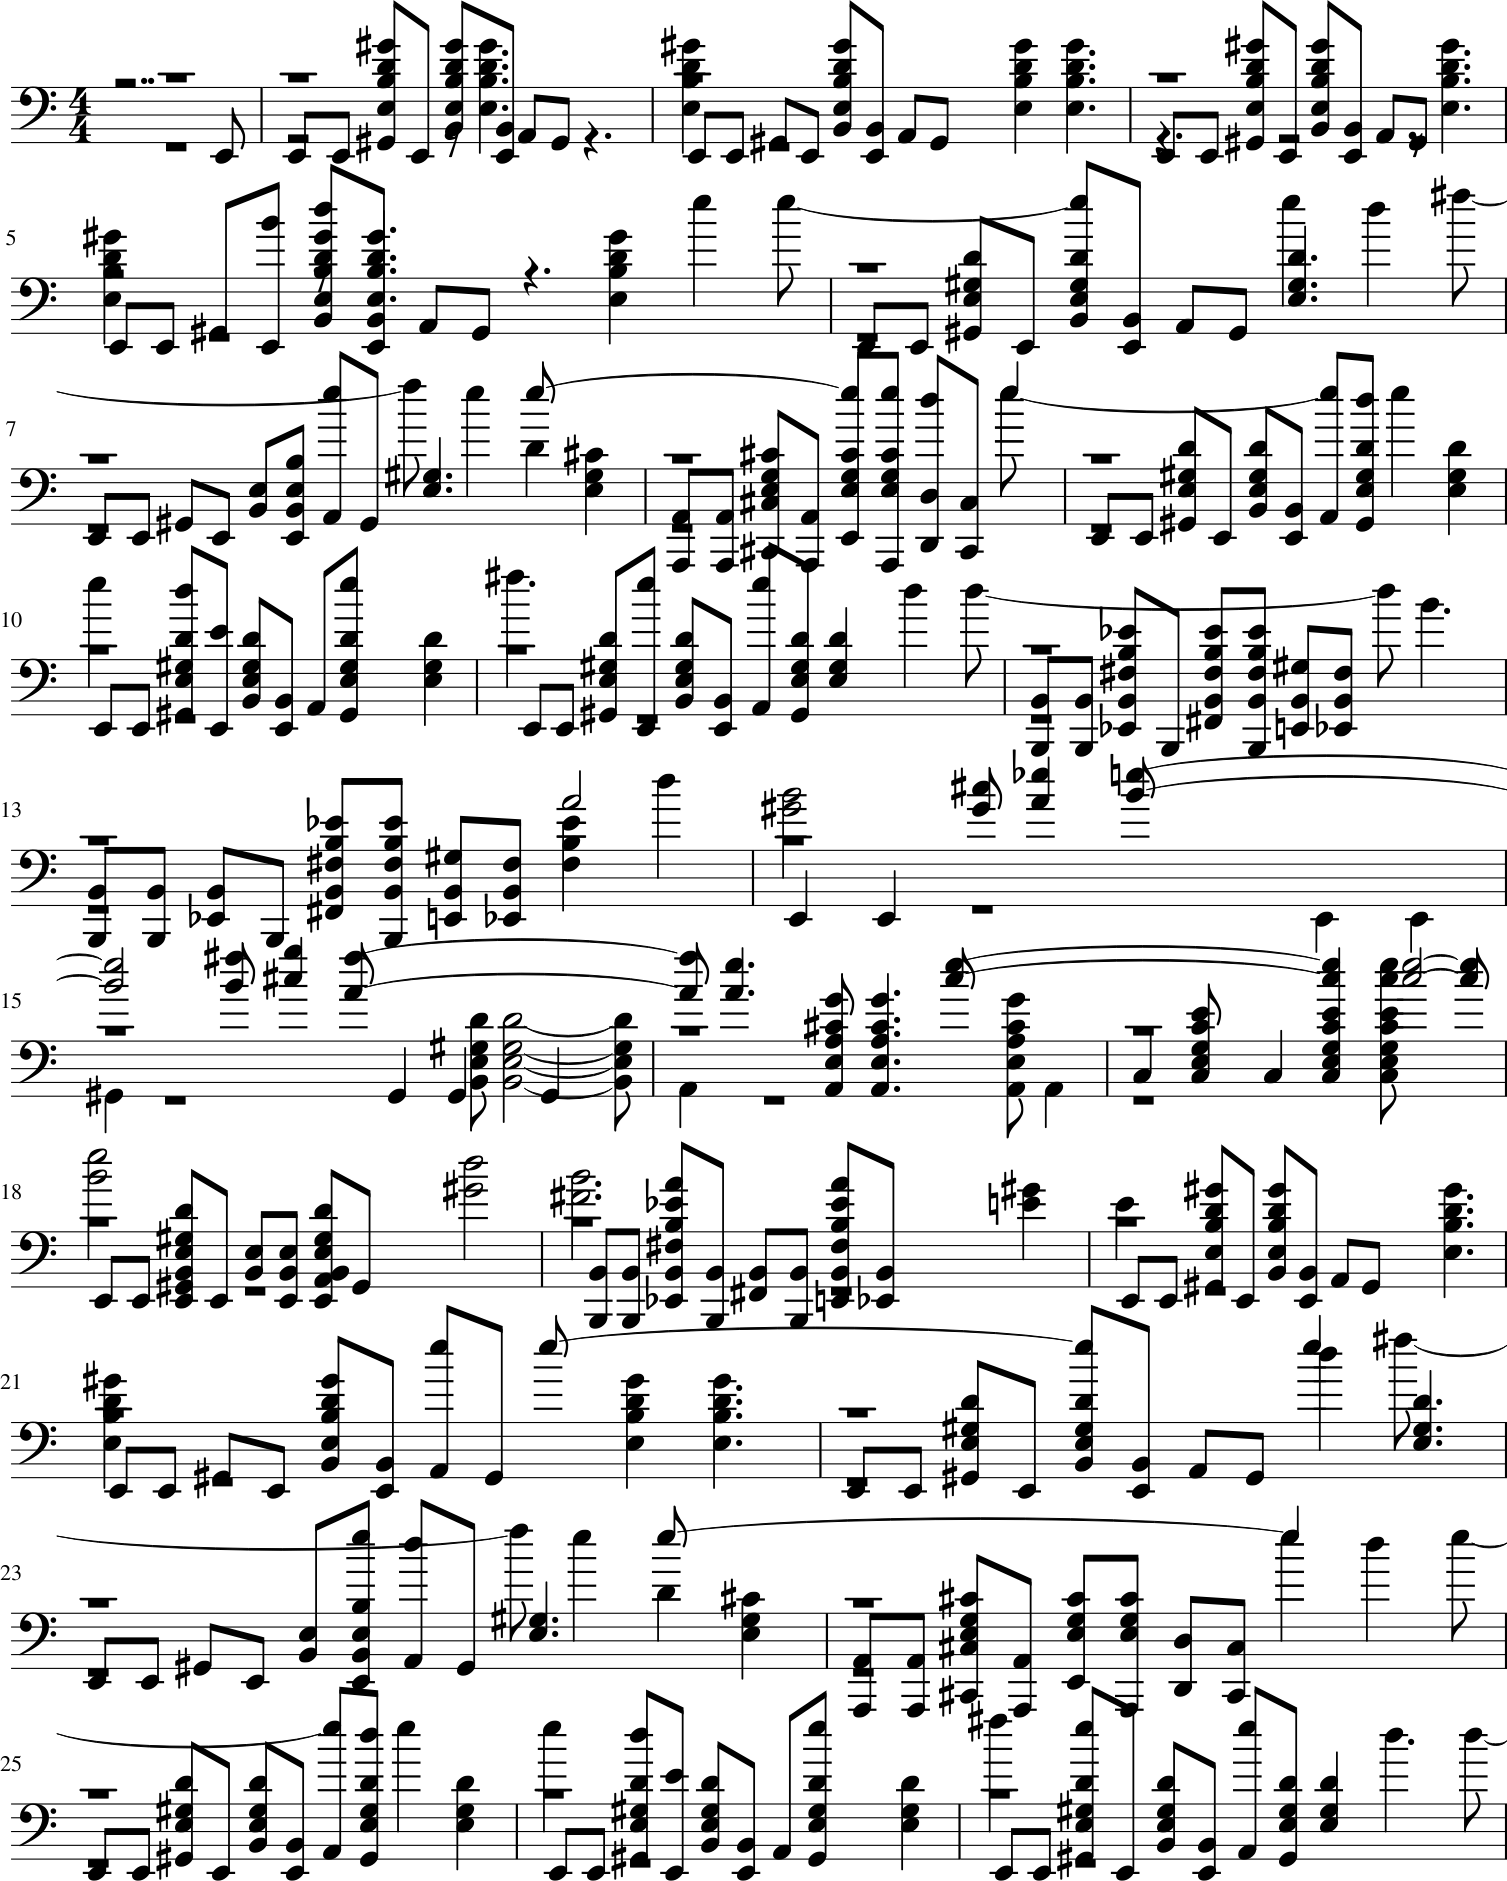

In [ ]:
item.show()

# Predict the new result

In [ ]:
data[0]

{'lyrics': '[Intro: Paul McCartney]\n1, 2, 3, 4!\n\n[Verse 1: Paul McCartney, McCartney & John Lennon]\nWell, she was just 17, if you know what I mean\nAnd the way she looked\nWas way beyond compare\nSo how could I dance with another? (Ooh)\nWhen I saw her standing there?\n\n[Verse 2: Paul McCartney, McCartney & John Lennon]\nWell, she looked at me, and I, I could see\nThat before too long, I\'d fall in love with her\nShe wouldn\'t dance with another (Woo)\nWhen I saw her standing there\n\n[Bridge: Paul McCartney & John Lennon]\nWell, my heart went "boom"\nWhen I crossed that room\nAnd I held her hand in mine\n\n[Verse 3: Paul McCartney, McCartney & John Lennon]\nWell, we danced through the night\nAnd we held each other tight\nAnd before too long, I fell in love with her\nNow, I\'ll never dance with another (Woo)\nSince I saw her standing there\n\n[Guitar Solo: George Harrison]\n\n[Bridge: Paul McCartney & John Lennon]\nWell, my heart went "boom"\nWhen I crossed that room\nAnd I held h

In [ ]:
item
item = MusicItem.from_file(i["midi"], vocab)
    i['np'] = item.to_tensor()


MusicItem - (9512,)
xxbos xxpad xxsep d24 n53 d1 n48 d1 xxsep d1...

In [ ]:

cutoff_beat = 10

In [ ]:
pred_data = list(map(lambda x:  MusicItem.from_file(x["midi"], vocab).trim_to_beat(cutoff_beat).to_tensor(), data[:20]))

In [ ]:
pred_data[0]

tensor([  0,   1,   8, 151,  49, 139,   8, 139,  49, 139,  49, 139,   8, 139,
         49, 139,  49, 139,   8, 139,  77, 139,  71, 139,  68, 139,  61, 139,
         53, 139,  53, 139,   8, 139,  49, 139,  49, 139,   8, 139,  77, 139,
         71, 139,  68, 139,  61, 139,  61, 139,  56, 139,  56, 139,   8, 139,
         77, 143,  71, 143,  68, 143,  61, 139,  61, 143,  56, 139,  49, 139,
          8, 139,  54, 139,  54, 139,   8, 139,  53, 139,  53, 139,   8, 139,
         77, 141,  71, 141,  68, 141,  61, 141,  49, 139,  49, 139,   8, 139,
         49, 139,  49, 139,   8, 139,  77, 141,  71, 141,  68, 141,  61, 141,
         53, 139,  53, 139,   8, 139,  49, 139,  49, 139], device='cuda:0')

In [ ]:
seed_item = MusicItem.from_file(data[0]['midi'], vocab).trim_to_beat(cutoff_beat)
seed_item.stream.write('midi', fp='data/seed_1.midi')

'data/seed_1.midi'

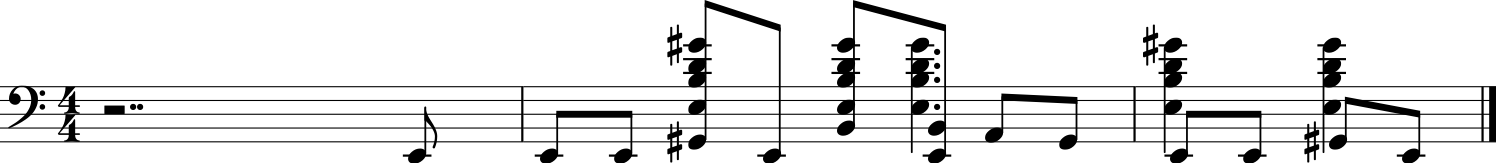

In [ ]:
seed_item.show()

In [ ]:
train_data

In [107]:
len(pred_data)

20

In [119]:
len(train_data)

288

In [173]:
data_mask, targets = get_batch(train_data, i)
src_mask = model.generate_square_subsequent_mask(data_mask.size(0)).to(device)

data_pred, targets = get_batch(pred_data, i)
src_pred_mask = model.generate_square_subsequent_mask(data_pred.size(0)).to(device)

In [175]:
model.eval()
output = model(data_pred, src_pred_mask)

In [184]:
output.transpose(1, 2).shape

torch.Size([8, 313, 148])

In [179]:
targets.shape

torch.Size([8, 148])

In [172]:
print(data_mask.shape)
print(data_pred.shape)

torch.Size([8, 9642])
torch.Size([8, 148])


In [174]:
print(src_mask.shape)
print(src_pred_mask.shape)

torch.Size([8, 8])
torch.Size([8, 8])


In [116]:
data_mask.shape


torch.Size([8, 9642])

In [122]:
bptt

8

In [152]:
model.eval() # Turn on the evaluation mode
seed_item = pred_data[0]

In [153]:
seed_item.shape[0]

122

In [151]:
seed_item = seed_item.reshape(1, seed_item.shape[0])
#seed_item.shape

RuntimeError: ignored

In [145]:
seed_item

tensor([[  0,   1,   8, 151,  49, 139,   8, 139,  49, 139,  49, 139,   8, 139,
          49, 139,  49, 139,   8, 139,  77, 139,  71, 139,  68, 139,  61, 139,
          53, 139,  53, 139,   8, 139,  49, 139,  49, 139,   8, 139,  77, 139,
          71, 139,  68, 139,  61, 139,  61, 139,  56, 139,  56, 139,   8, 139,
          77, 143,  71, 143,  68, 143,  61, 139,  61, 143,  56, 139,  49, 139,
           8, 139,  54, 139,  54, 139,   8, 139,  53, 139,  53, 139,   8, 139,
          77, 141,  71, 141,  68, 141,  61, 141,  49, 139,  49, 139,   8, 139,
          49, 139,  49, 139,   8, 139,  77, 141,  71, 141,  68, 141,  61, 141,
          53, 139,  53, 139,   8, 139,  49, 139,  49, 139]], device='cuda:0')

In [166]:
src_mask = best_model.generate_square_subsequent_mask(seed_item.size(0)).to(device)


In [167]:
src_mask

tensor([[0., -inf, -inf,  ..., -inf, -inf, -inf],
        [0., 0., -inf,  ..., -inf, -inf, -inf],
        [0., 0., 0.,  ..., -inf, -inf, -inf],
        ...,
        [0., 0., 0.,  ..., 0., -inf, -inf],
        [0., 0., 0.,  ..., 0., 0., -inf],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')

In [169]:
output = best_model(torch.tensor(seed_item).to(device), src_mask)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


In [170]:
output.shape

torch.Size([122, 122, 313])

In [164]:
output[0,0,:10]

tensor([ 0.0355,  6.5434, -0.5722, -0.2746, -0.6191, -0.3044, -0.7509,  0.0263,
         1.4325, -0.0443], device='cuda:0', grad_fn=<SliceBackward>)

In [165]:
output[0,1,:10]

tensor([-0.8747, -0.9609, -1.0158, -0.9198, -1.1710, -1.2121, -1.2825, -1.0527,
         7.2253, -1.2052], device='cuda:0', grad_fn=<SliceBackward>)

---

In [211]:
test = np.random.randint(0, ntokens, (1, 500))
test[:, 0] = 0
test[:, 1] = 1
test = np.expand_dims(data[0]['np'][:20], axis=0)

TypeError: ignored

In [212]:
test.shape

(1, 500)

In [325]:
data[0]['np'] == 138

tensor([False, False, False,  ..., False, False, False], device='cuda:0')

In [307]:
seed_item[:10].shape
seed = np.expand_dims(seed_item.cpu(), axis=0)

In [299]:
seed_item

tensor([  0,   1,   8, 151,  49, 139,   8, 139,  49, 139,  49, 139,   8, 139,
         49, 139,  49, 139,   8, 139,  77, 139,  71, 139,  68, 139,  61, 139,
         53, 139,  53, 139,   8, 139,  49, 139,  49, 139,   8, 139,  77, 139,
         71, 139,  68, 139,  61, 139,  61, 139,  56, 139,  56, 139,   8, 139,
         77, 143,  71, 143,  68, 143,  61, 139,  61, 143,  56, 139,  49, 139,
          8, 139,  54, 139,  54, 139,   8, 139,  53, 139,  53, 139,   8, 139,
         77, 141,  71, 141,  68, 141,  61, 141,  49, 139,  49, 139,   8, 139,
         49, 139,  49, 139,   8, 139,  77, 141,  71, 141,  68, 141,  61, 141,
         53, 139,  53, 139,   8, 139,  49, 139,  49, 139], device='cuda:0')

In [317]:
seed[0,:1]

array([0])

In [313]:
seed.shape

(1, 122)

In [319]:
#test = np.append(seed , np.random.randint(0, ntokens, (1, 1)))
test = seed[0,:1]
for i in range(10):
  #test = np.append(test , np.random.randint(0, ntokens, (1, 1)))
  test = np.append(test , seed[0,i+1:i+2])
  
  test = np.expand_dims(test, axis=0)
  print("test",test)
  print(test.shape)
  src_mask = best_model.generate_square_subsequent_mask(1).to(device)
  output = best_model(torch.tensor(test).to(device), src_mask)
  music = torch.max(output, dim=2)[1]
  print("music",music)
  print('------------')

test [[0 1]]
(1, 2)
music tensor([[1, 8]], device='cuda:0')
------------
test [[0 1 8]]
(1, 3)
music tensor([[  1,   8, 139]], device='cuda:0')
------------
test [[  0   1   8 151]]
(1, 4)
music tensor([[  1,   8, 139,   8]], device='cuda:0')
------------
test [[  0   1   8 151  49]]
(1, 5)
music tensor([[  1,   8, 139,   8, 138]], device='cuda:0')
------------
test [[  0   1   8 151  49 139]]
(1, 6)
music tensor([[  1,   8, 139,   8, 138,   8]], device='cuda:0')
------------
test [[  0   1   8 151  49 139   8]]
(1, 7)
music tensor([[  1,   8, 139,   8, 138,   8, 139]], device='cuda:0')
------------
test [[  0   1   8 151  49 139   8 139]]
(1, 8)
music tensor([[  1,   8, 139,   8, 138,   8, 139,   8]], device='cuda:0')
------------
test [[  0   1   8 151  49 139   8 139  49]]
(1, 9)
music tensor([[  1,   8, 139,   8, 138,   8, 139,   8, 138]], device='cuda:0')
------------
test [[  0   1   8 151  49 139   8 139  49 139]]
(1, 10)
music tensor([[  1,   8, 139,   8, 138,   8, 139,   8, 13

In [282]:
output.shape

torch.Size([1, 500, 313])

In [283]:
music = torch.max(output, dim=2)[1]

In [284]:
music.shape

torch.Size([1, 500])

In [287]:
music

tensor([[  1,   8, 139,   8, 138,   8, 139,   8, 138,   8, 138, 138, 138, 138,
         138, 138, 138, 138, 138,   8, 138, 138, 138, 138, 138, 138, 138, 138,
         138, 138, 138, 138,   8, 138, 138, 138,   8, 138, 138, 138, 138, 138,
           8, 138, 138,   8, 138, 138,   8, 138, 138, 138, 138,   8, 138, 138,
         138,   8, 138, 138, 138, 138,   8,   8, 138, 138, 138, 138, 138,   8,
         138, 138, 138,   8, 138, 138, 138, 138,   8, 138, 138, 138,   8, 138,
         138, 138, 138, 138, 138,   8,   8,   8, 138,   8, 138, 138, 138, 138,
           8, 138, 139, 138,   8, 138, 138, 138, 138, 138, 138, 138, 138,   8,
           8, 138,   8, 138,   8, 138, 138, 138, 138,   8, 138, 138, 138,   8,
         138, 138, 138,   8, 138, 138, 138, 138, 138, 138,   8,   8, 138, 138,
           8, 138, 138, 138, 138, 138, 138, 138,   8, 138, 138, 138,   8, 138,
         138,   8, 138, 138, 138, 138, 138, 138,   8, 138, 139, 138, 138, 138,
         138, 138, 138, 138, 138, 138, 138, 138, 138

Non midi note detected. Only returning valid portion. Index, seed 5 (249, 2)


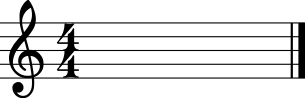

In [286]:
music_temp = torch.squeeze(music, 0).cpu().numpy()
npenc = idxenc2npenc(music_temp, vocab)
item = MusicItem.from_npenc(npenc, vocab)
item.show()

In [288]:
seed_item

tensor([  0,   1,   8, 151,  49, 139,   8, 139,  49, 139,  49, 139,   8, 139,
         49, 139,  49, 139,   8, 139,  77, 139,  71, 139,  68, 139,  61, 139,
         53, 139,  53, 139,   8, 139,  49, 139,  49, 139,   8, 139,  77, 139,
         71, 139,  68, 139,  61, 139,  61, 139,  56, 139,  56, 139,   8, 139,
         77, 143,  71, 143,  68, 143,  61, 139,  61, 143,  56, 139,  49, 139,
          8, 139,  54, 139,  54, 139,   8, 139,  53, 139,  53, 139,   8, 139,
         77, 141,  71, 141,  68, 141,  61, 141,  49, 139,  49, 139,   8, 139,
         49, 139,  49, 139,   8, 139,  77, 141,  71, 141,  68, 141,  61, 141,
         53, 139,  53, 139,   8, 139,  49, 139,  49, 139], device='cuda:0')

In [230]:
npenc = idxenc2npenc(music, vocab)
item = MusicItem.from_npenc(npenc, vocab)
item


MusicItem - (28,)
xxbos xxpad xxsep d14 n40 d2 xxsep d2 n40 d2...

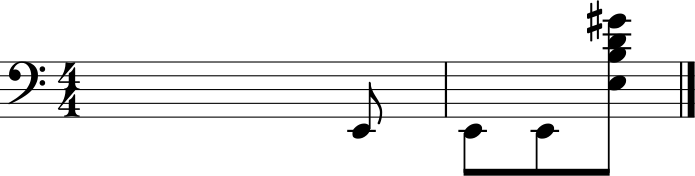

In [231]:
item.show()

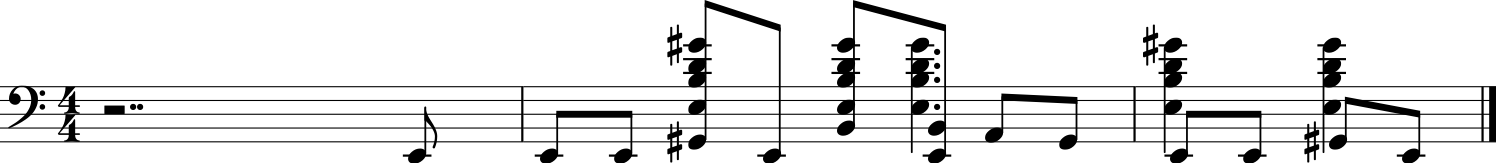

In [201]:
npenc = idxenc2npenc(seed_item.cpu().numpy(), vocab)
item = MusicItem.from_npenc(npenc, vocab)
item.show()